# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann

# CONJUNTO DE EJERCICIOS 

### 3. Completar la función del spline cúbico con frontera natural 

![Cubic Spline](img/FronteraNatural.jpg)

In [5]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] + [0] * n
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

1. Oderna los puntos $(x_i,y_i)$
2. Calcula $h_i$ entre puntos consecutivos $(x_{i+1} - x_i)$
3. Determina las diferencias entre $y_i$
4. Resuelve el sitema: $l, u , z$
5. Condiciones de frontera natural. Segundas derivadas en los extremos sean cero.
6. Calcula los coeficientes $a,b,c,d$ para cada **spline**
7. Construye los **splines**

### 4. Usando la función anterior, encuentre el spline cúbico para:

In [1]:
xs = [1, 2, 3]
ys = [2, 3, 5]

In [6]:
splines_ejecicio4 = cubic_spline(xs, ys)

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


In [17]:
splines_ejecicio4

[0.75*x + 0.25*(x - 1)**3 + 1.25, 1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2]

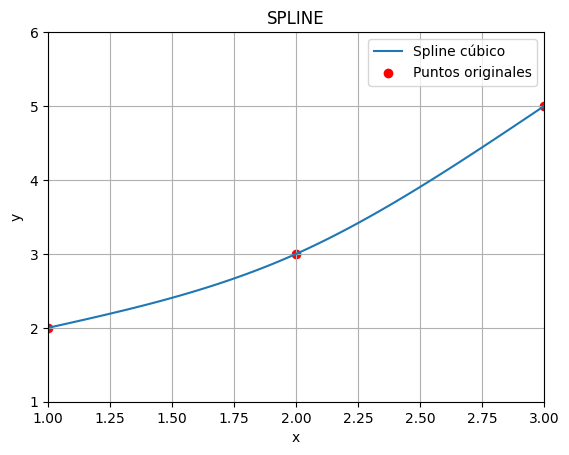

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Graficar el spline
plt.xlabel('x')
plt.ylabel('y')
plt.title('SPLINE')

# Línea del spline
plt.plot(x_vals, y_vals, label="Spline cúbico")

# Puntos originales en rojo
plt.scatter(xs, ys, color='red', label="Puntos originales")

# Configurar límites y estética
ax = plt.gca()
ax.set_ylim([1, 6])
ax.set_xlim([1, 3])
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()
